In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import random
%matplotlib inline

## Cross-sectional Estimator

In [28]:
n = 1000
T = np.random.choice(2, n)
eps = 0.5*np.random.normal(size=n)
y = 0.5 + 2*T + eps
print(T[:20])
y[:30]

[0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0]


array([ 0.35013828,  0.93362457,  1.92008996,  1.04593703, -0.23319757,
       -0.19596291,  1.65199966,  2.30525299,  0.54069345,  0.33916142,
        2.79098495,  0.03156435,  0.39632739,  1.28612862,  3.4032495 ,
        0.33588467,  3.10921524,  2.55695253,  1.06903071,  0.51662485,
       -0.36102209,  0.94130395,  1.41958885,  1.5365542 ,  3.13886427,
        0.5394419 ,  1.3029773 ,  0.62342698,  2.81044764,  0.33043563])

In [29]:
df = pd.DataFrame({"y" : y, "T" : T })
print(df.head(10))

   T         y
0  0  0.350138
1  0  0.933625
2  1  1.920090
3  0  1.045937
4  0 -0.233198
5  0 -0.195963
6  1  1.652000
7  1  2.305253
8  0  0.540693
9  0  0.339161


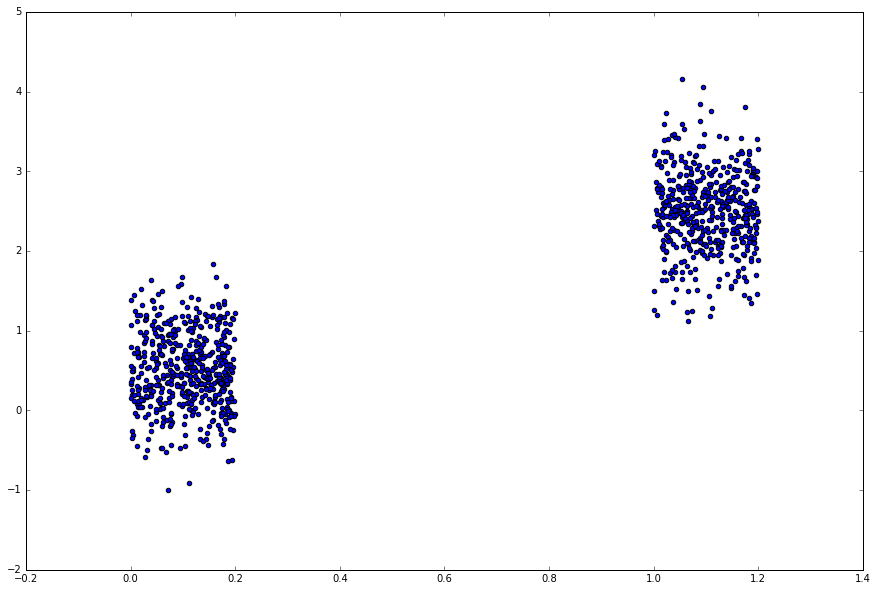

In [30]:
plt.figure(figsize=(15,10))
plt.scatter(df['T'] + 0.2*np.random.uniform(size=n), df['y'])

In [ ]:
df.groupby("T").mean()

In [ ]:
m = smf.ols(formula = "y~T", data=df).fit()
print(m.summary())

## Before-after

In [31]:
n = 1000
time = np.random.choice(2, n)
eps = 0.5*np.random.normal(size=n)
jobs = 0.5 + 2*(time > 0) + eps
jobs[:30]

array([ 2.03881563,  0.76164724,  2.16877614,  1.17077347,  0.30377935,
        0.93345657,  0.57426437,  1.47461056,  2.4140415 ,  0.68234757,
        2.90044813, -0.00756283,  2.28805001,  2.63348221,  0.58838389,
        0.41480801,  0.96183153,  2.31542778,  2.46701433,  2.0431464 ,
        1.71059028,  1.01604312,  0.84979166,  1.70342725,  2.7285863 ,
        0.55891662,  1.18459954,  2.17691814,  1.51787459,  0.7026548 ])

In [ ]:
tc = pd.DataFrame({"jobs" : jobs, "time" : time })
print(tc.head(10))

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(tc['time'] + 0.2*np.random.uniform(size=n), tc['jobs'])

In [ ]:
m = smf.ols(formula = "jobs~time", data=tc).fit()
print(m.summary())

## Dif-in-dif estimator

In [ ]:
n = 1000
country = np.random.choice(['us','ca'], n)
print(country[:10])
time = np.random.choice(['b', 'a'], n)
eps = 0.5*np.random.normal(size=n)
jobs = 0.5 + 2*(country == 'us') + 0.8*(time == 'a') + 0.5*(time == 'a')*(country =='us') + eps
didDf = pd.DataFrame({"jobs" : jobs, "country" : country, 'time':time })
didDf.head()

In [ ]:
didDf.groupby(['country', 'time']).mean()

In [ ]:
m = smf.ols(formula = "jobs~time*country", data=didDf).fit()
print(m.summary())